In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the raw data with proper encoding
df = pd.read_csv('most_valuable_teams (1).csv', encoding='utf-8')

In [5]:
# =============================================
# 1. IMPROVED DATA CLEANING
# =============================================
def clean_currency(value):
    # Handle both possible Euro symbol encodings and remove all non-numeric chars
    if isinstance(value, str):
        value = value.replace('â‚¬', '').replace('€', '')
        if 'bn' in value:
            return float(value.replace('bn', '').strip()) * 1e9
        elif 'm' in value:
            return float(value.replace('m', '').strip()) * 1e6
        # For values without suffixes, remove all non-numeric characters
        cleaned = ''.join(c for c in value if c.isdigit() or c == '.')
        return float(cleaned) if cleaned else 0.0
    return value

print("\nCleaning Market_value column...")
df['Market_value'] = df['Market_value'].apply(clean_currency)

# Verify cleaning worked
print("\nCleaned Data (First 5 Rows):")
print(df[['Club', 'Market_value']].head())



Cleaning Market_value column...

Cleaned Data (First 5 Rows):
                  Club  Market_value
0      Manchester City  1.050000e+09
1  Paris Saint-Germain  9.977500e+08
2    Manchester United  9.372500e+08
3           Chelsea FC  8.825000e+08
4         Liverpool FC  8.795000e+08


In [6]:
# =============================================
# 2. DATA VERIFICATION
# =============================================
print("\n\n=== DATA VERIFICATION ===")
print("Sample Market Values:")
print(df['Market_value'].head().apply(lambda x: f"€{x/1e9:.2f}B"))



=== DATA VERIFICATION ===
Sample Market Values:
0    €1.05B
1    €1.00B
2    €0.94B
3    €0.88B
4    €0.88B
Name: Market_value, dtype: object


In [7]:
# =============================================
# 3. KEY STATISTICS
# =============================================
print("\n\n=== KEY STATISTICS ===")
print("Market Value Stats:")
stats = df['Market_value'].describe()
print(f"Count: {stats['count']:.0f} teams")
print(f"Average: €{stats['mean']/1e9:.2f}B")
print(f"Max: €{stats['max']/1e9:.2f}B ({(df.loc[df['Market_value'].idxmax(), 'Club'])})")



=== KEY STATISTICS ===
Market Value Stats:
Count: 100 teams
Average: €0.29B
Max: €1.05B (Manchester City)


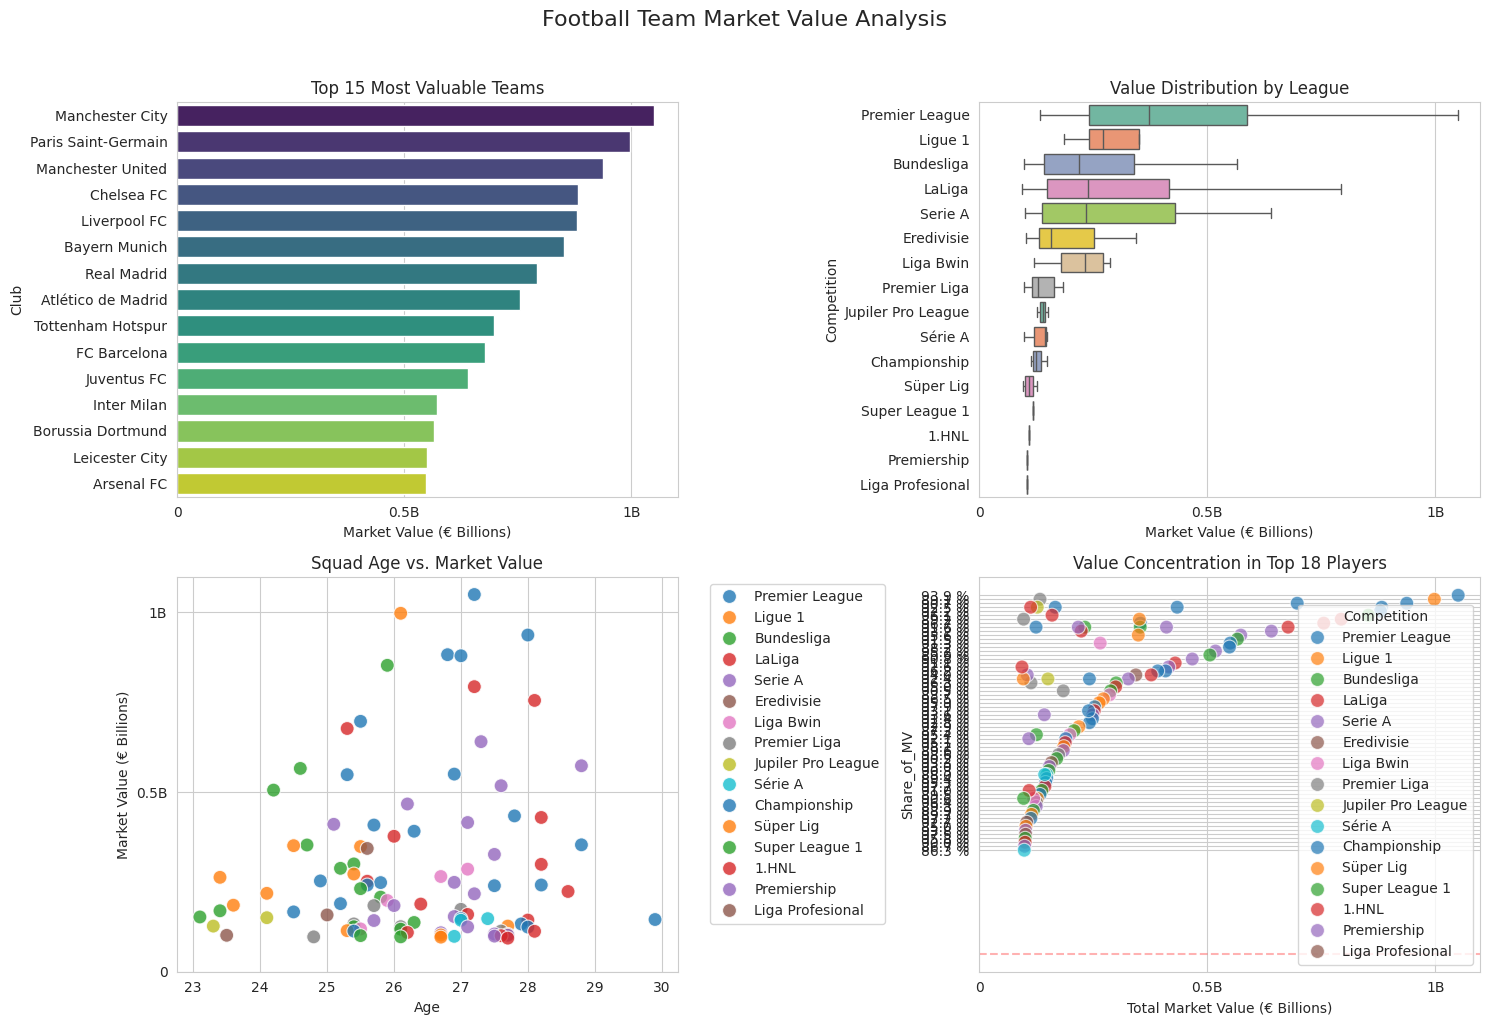

In [8]:
# =============================================
# 4. VISUALIZATIONS
# =============================================
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.suptitle('Football Team Market Value Analysis', fontsize=16, y=1.02)

# 1. Top 15 Teams - Fixed
plt.subplot(2, 2, 1)
top_15 = df.nlargest(15, 'Market_value')
sns.barplot(x='Market_value', y='Club', data=top_15, 
           hue='Club', palette='viridis', legend=False)
plt.title('Top 15 Most Valuable Teams')
plt.xlabel('Market Value (€ Billions)')
plt.xticks(ticks=[0, 5e8, 1e9], labels=['0', '0.5B', '1B'])

# 2. League Distribution - Fixed
plt.subplot(2, 2, 2)
sns.boxplot(x='Market_value', y='Competition', data=df,
           hue='Competition', palette='Set2', legend=False, showfliers=False)
plt.title('Value Distribution by League')
plt.xlabel('Market Value (€ Billions)')
plt.xticks(ticks=[0, 5e8, 1e9], labels=['0', '0.5B', '1B'])

# 3. Age vs. Value
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Market_value', hue='Competition',
               data=df, s=100, palette='tab10', alpha=0.8)
plt.title('Squad Age vs. Market Value')
plt.ylabel('Market Value (€ Billions)')
plt.yticks(ticks=[0, 5e8, 1e9], labels=['0', '0.5B', '1B'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Value Concentration
plt.subplot(2, 2, 4)
sns.scatterplot(x='Market_value', y='Share_of_MV', hue='Competition',
               data=df, s=100, palette='tab10', alpha=0.7)
plt.title('Value Concentration in Top 18 Players')
plt.xlabel('Total Market Value (€ Billions)')
plt.xticks(ticks=[0, 5e8, 1e9], labels=['0', '0.5B', '1B'])
plt.axhline(y=90, color='red', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('team_analysis_enhanced.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
!pip install tabulate


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


1. What league has the highest average team market value?

In [10]:
# Calculate average market value by league and sort descending
league_avg_value = df.groupby('Competition')['Market_value'].mean()\
                     .sort_values(ascending=False)\
                     .reset_index()

# Display top 5 leagues
print("Top Leagues by Average Team Market Value:")
print(league_avg_value.head().to_markdown(index=False))

# Get the top league
top_league = league_avg_value.iloc[0]
print(f"\nThe league with highest average value is {top_league['Competition']} at €{top_league['Market_value']/1e9:.2f}B")

Top Leagues by Average Team Market Value:
| Competition    |   Market_value |
|:---------------|---------------:|
| Premier League |    4.49425e+08 |
| Ligue 1        |    3.76471e+08 |
| LaLiga         |    3.28868e+08 |
| Serie A        |    2.95649e+08 |
| Bundesliga     |    2.91833e+08 |

The league with highest average value is Premier League at €0.45B


2. Is there a correlation between squad age and market value?

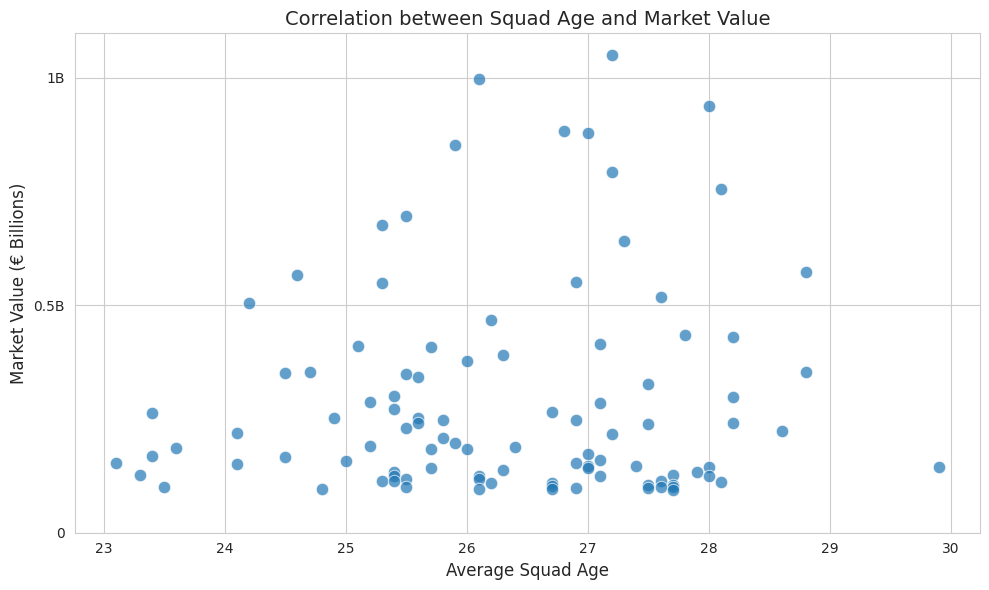


Correlation coefficient between Squad Age and Market Value: 0.10


In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Market_value', data=df, s=80, alpha=0.7)
plt.title('Correlation between Squad Age and Market Value', fontsize=14)
plt.xlabel('Average Squad Age', fontsize=12)
plt.ylabel('Market Value (€ Billions)', fontsize=12)
plt.yticks(ticks=[0, 5e8, 1e9], labels=['0', '0.5B', '1B'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = df['Age'].corr(df['Market_value'])
print(f"\nCorrelation coefficient between Squad Age and Market Value: {correlation:.2f}")

3. How does squad size relate to total market value?

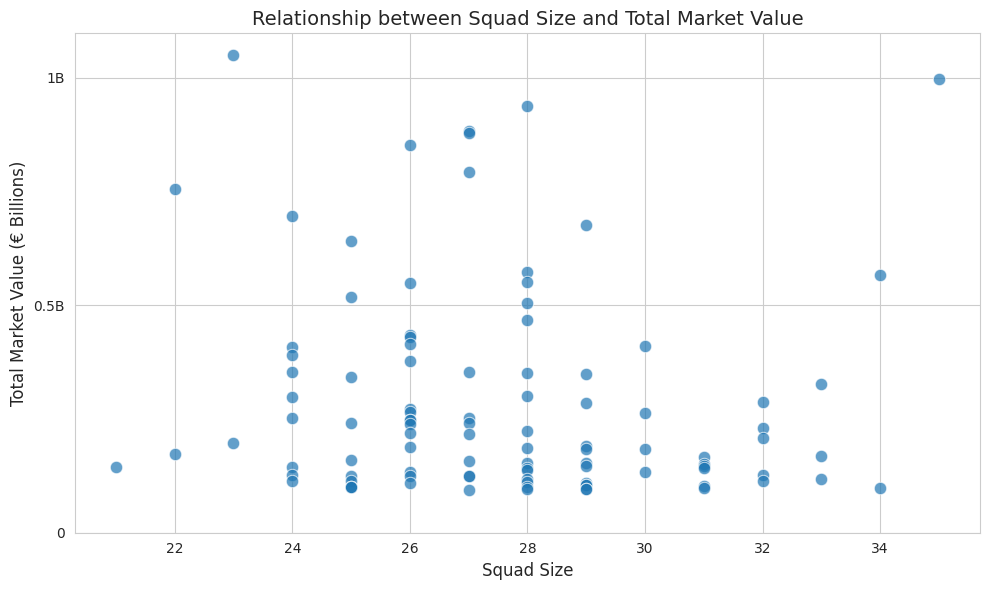


Correlation coefficient between Squad Size and Total Market Value: -0.11


In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Squad_size', y='Market_value', data=df, s=80, alpha=0.7)
plt.title('Relationship between Squad Size and Total Market Value', fontsize=14)
plt.xlabel('Squad Size', fontsize=12)
plt.ylabel('Total Market Value (€ Billions)', fontsize=12)
plt.yticks(ticks=[0, 5e8, 1e9], labels=['0', '0.5B', '1B'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = df['Squad_size'].corr(df['Market_value'])
print(f"\nCorrelation coefficient between Squad Size and Total Market Value: {correlation:.2f}")

4. Which clubs have the highest share of value in their top 18 players?

/tmp/ipykernel_662/961370778.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Share_of_MV', y='Club', data=top_share_clubs, palette='viridis')


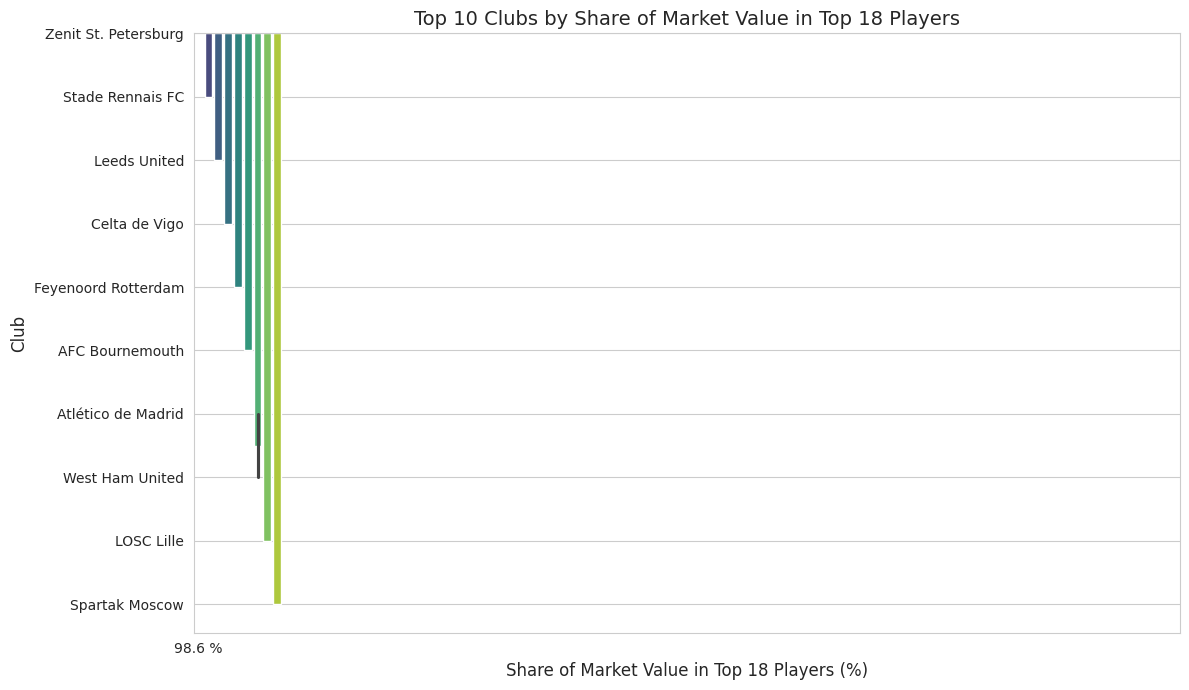


Top Clubs by Share of Market Value in Top 18 Players:
| Club                 | Share_of_MV   |
|:---------------------|:--------------|
| Zenit St. Petersburg | 98.6 %        |
| Stade Rennais FC     | 98.2 %        |
| Leeds United         | 97.9 %        |
| Celta de Vigo        | 97.7 %        |
| Feyenoord Rotterdam  | 97.5 %        |
| AFC Bournemouth      | 97.2 %        |
| Atlético de Madrid   | 96.7 %        |
| West Ham United      | 96.7 %        |
| LOSC Lille           | 96.5 %        |
| Spartak Moscow       | 96.4 %        |


In [13]:
# Sort the DataFrame by 'Share_of_MV' in descending order to get the clubs with the highest share
top_share_clubs = df.sort_values(by='Share_of_MV', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Share_of_MV', y='Club', data=top_share_clubs, palette='viridis')
plt.title('Top 10 Clubs by Share of Market Value in Top 18 Players', fontsize=14)
plt.xlabel('Share of Market Value in Top 18 Players (%)', fontsize=12)
plt.ylabel('Club', fontsize=12)
plt.xticks(range(0, 101, 10)) # Set x-axis ticks from 0 to 100
plt.tight_layout()
plt.show()

# Display the top clubs and their share of market value in a table
print("\nTop Clubs by Share of Market Value in Top 18 Players:")
print(top_share_clubs[['Club', 'Share_of_MV']].to_markdown(index=False))

5. Which club has the highest market value, and which league does it belong to?

In [15]:
# Assuming your DataFrame 'df' is already loaded and cleaned

# Find the club with the highest market value
highest_value_club = df.loc[df['Market_value'].idxmax()]

# Extract the club name and its league
club_name = highest_value_club['Club']
league_name = highest_value_club['Competition']
market_value = highest_value_club['Market_value']

# Format the market value for better readability
market_value_billions = f"€{market_value / 1e9:.2f} Billion"

# Print the result
print(f"The club with the highest market value is **{club_name}** with a value of **{market_value_billions}**.")
print(f"It belongs to the **{league_name}**.")

The club with the highest market value is **Manchester City** with a value of **€1.05 Billion**.
It belongs to the **Premier League**.


6. Are younger squads more valuable on average?

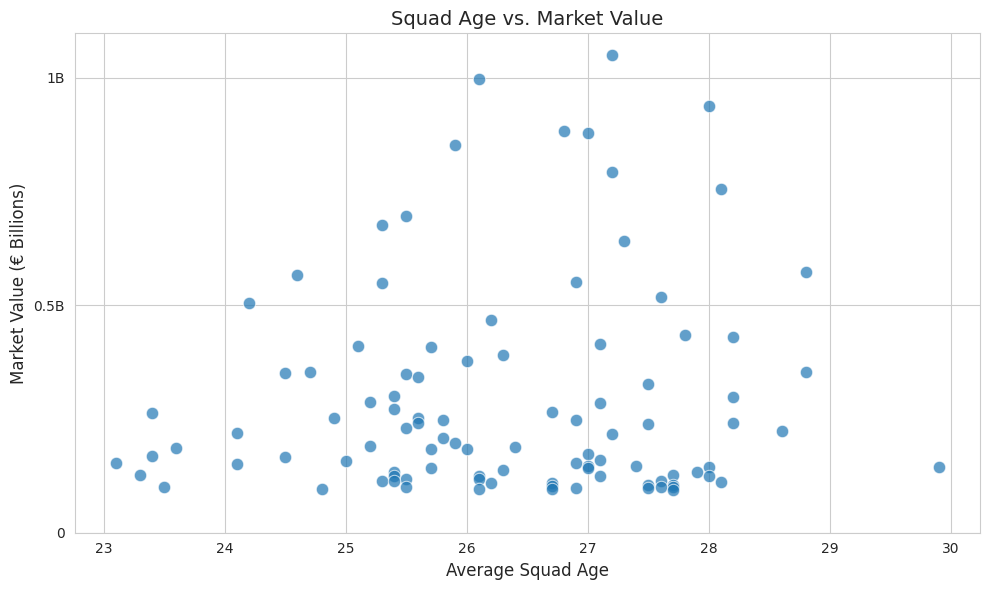


Correlation coefficient between Average Squad Age and Market Value: 0.10

Average Market Value by Average Squad Age:
|   Age |   Market_value |
|------:|---------------:|
|  23.1 |    1.524e+08   |
|  23.3 |    1.27e+08    |
|  23.4 |    2.1619e+08  |
|  23.5 |    1.014e+08   |
|  23.6 |    1.8515e+08  |
|  24.1 |    1.84325e+08 |
|  24.2 |    5.0555e+08  |
|  24.5 |    2.58675e+08 |
|  24.6 |    5.659e+08   |
|  24.7 |    3.5275e+08  |
|  24.8 |    9.703e+07   |
|  24.9 |    2.527e+08   |
|  25   |    1.5805e+08  |
|  25.1 |    4.1035e+08  |
|  25.2 |    2.3869e+08  |
|  25.3 |    4.4661e+08  |
|  25.4 |    1.8864e+08  |
|  25.5 |    2.9928e+08  |
|  25.6 |    2.788e+08   |
|  25.7 |    2.44927e+08 |
|  25.8 |    2.27875e+08 |
|  25.9 |    5.2555e+08  |
|  26   |    2.80565e+08 |
|  26.1 |    3.347e+08   |
|  26.2 |    2.8805e+08  |
|  26.3 |    2.64075e+08 |
|  26.4 |    1.883e+08   |
|  26.7 |    1.42982e+08 |
|  26.8 |    8.825e+08   |
|  26.9 |    2.6272e+08  |
|  27   |    3.360

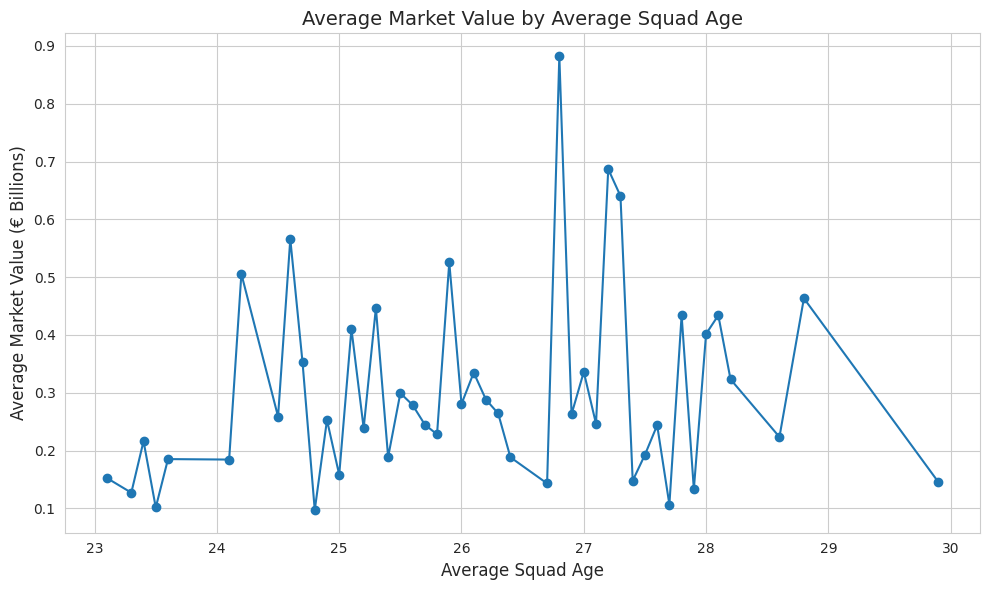

In [16]:
# Create a scatter plot of Age vs. Market Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Market_value', data=df, s=80, alpha=0.7)
plt.title('Squad Age vs. Market Value', fontsize=14)
plt.xlabel('Average Squad Age', fontsize=12)
plt.ylabel('Market Value (€ Billions)', fontsize=12)
plt.yticks(ticks=[0, 5e8, 1e9], labels=['0', '0.5B', '1B'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = df['Age'].corr(df['Market_value'])
print(f"\nCorrelation coefficient between Average Squad Age and Market Value: {correlation:.2f}")

# Group by age (you might want to bin ages if you have a wide range and many unique values)
# For simplicity, we'll use the raw age values here
average_value_by_age = df.groupby('Age')['Market_value'].mean().sort_index()
print("\nAverage Market Value by Average Squad Age:")
print(average_value_by_age.to_markdown())

# Optional: Create a line plot of average value by age
plt.figure(figsize=(10, 6))
plt.plot(average_value_by_age.index, average_value_by_age.values / 1e9, marker='o')
plt.title('Average Market Value by Average Squad Age', fontsize=14)
plt.xlabel('Average Squad Age', fontsize=12)
plt.ylabel('Average Market Value (€ Billions)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

1. What league has the highest average team market value?

    R/ The league with the highest average team market value is the Premier League with a Market value of 4.49425e+08

2. Is there a correlation between squad age and market value?

    R/ There is a weak positive correlation (coefficient of 0.10) between squad age and market value

3. How does squad size relate to total market value?

    R/ Correlation coefficient between Squad Size and Total Market Value: -0.11 (weak negative correlation)

4. Which clubs have the highest share of value in their top 18 players?

    R/ The clubs with the highest share value in their top 18 players are, from lowest to highest:

   * Zenit St. Petersburg
   * Stade Rennais FC
   * Leeds United
   * Celta de Vigo
   * Feyenoord Rotterdam
   * AFC Bournemouth
   * Atletico de Madrid
   * West Ham United
   * LOSC Lille
   * Spartak Moscow

6. Which club has the highest market value, and which league does it belong to?

    R/ The club with the highest market value is **Manchester City** with a value of **€1.05 Billion**.
    It belongs to the **Premier League**.

7. Are younger squads more valuable on average?

    R/ The correlation between Average Squad Age and Market Value is interpreted as a weak positive correlation; even so, we can see in the line plot a higher average           market value for player's ages close to ≈26,8.

Conclusion: The insights and table/graph analysis shown above are a tiny part of what the football/soccer passion can follow, a world full of possibilities for data analysis where, despite thinking about clear or obvious correlations, reality appears as a much more complex matter than it appears to be, finding out useful data in both simple/broad questions and complex/specific approaches.